# YouTube Adview Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
data = pd.read_csv('YouTube.csv')
data

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D
...,...,...,...,...,...,...,...,...,...
14994,VID_31,2,525949,1137,83,86,2015-05-18,PT6M10S,A
14995,VID_5861,1,665673,3849,156,569,2015-10-20,PT3M56S,D
14996,VID_805,4,3479,16,1,1,2013-08-23,PT3M13S,B
14997,VID_19843,1,963,0,0,0,2010-10-02,PT26S,G


In [3]:
category = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8}
data["category"] = data["category"].map(category)
data.head(10)

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4
5,VID_10756,4,78,0,0,0,2016-05-09,PT15S,4
6,VID_9782,40621,43118,15,1,0,2015-08-21,PT3M20S,4
7,VID_16452,1,14205,55,16,1,2016-08-01,PT58S,5
8,VID_18486,1,526015,3064,211,2582,2015-11-06,PT27M50S,6
9,VID_681,1,406992,3831,310,7839,2016-10-03,PT11M19S,2


In [4]:
#Removing character F present in the data
data = data[data.views!='F']
data = data[data.likes!='F']
data = data[data.dislikes!='F']
data = data[data.comment!='F']

In [5]:
#convert values to numericals
data["views"] = pd.to_numeric(data["views"])
data["comment"] = pd.to_numeric(data["comment"])
data["likes"] = pd.to_numeric(data["likes"])
data["dislikes"] = pd.to_numeric(data["dislikes"])
data["adview"] = pd.to_numeric(data["adview"])

In [6]:
#Feature Encoding
from sklearn.preprocessing import LabelEncoder
data['duration'] = LabelEncoder().fit_transform(data['duration'])
data['vidid'] = LabelEncoder().fit_transform(data['vidid'])
data['published'] = LabelEncoder().fit_transform(data['published'])
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [7]:
#Time in second for duration
import datetime
import time

def checki(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    mm = ''
    P = ['H', 'M', 'S']
    for i in y:
        if i not in P:
            mm += i
        else:
            if(i == 'H'):
                h = mm
                mm = ''
            elif(i == 'M'):
                m = mm
                mm = ''
            else:
                s = mm
                mm = ''
    if(h == ''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s == ''):
        s = '00'
    bp = h+':'+m+':'+s
    return bp
train = pd.read_csv('YouTube.csv')
mp = pd.read_csv('YouTube.csv')['duration']
time = mp.apply(checki)

In [8]:
def fun_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)
time1 = time.apply(fun_sec)

In [9]:
data['duration'] = time1
data.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


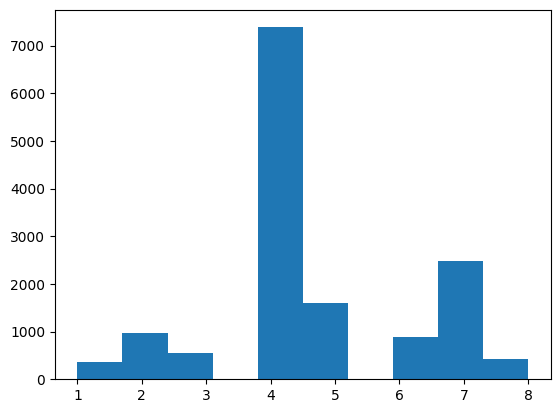

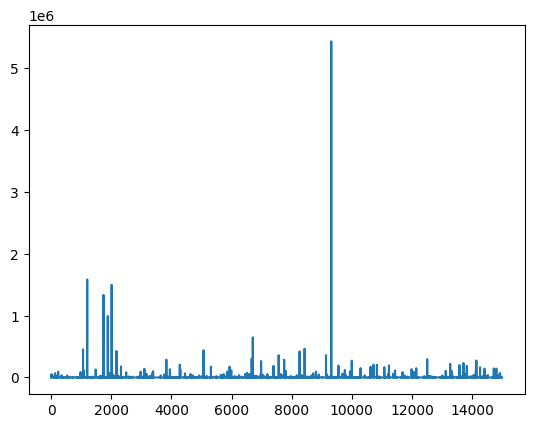

In [10]:
#Visualize Individual Plot
plt.hist(data['category'])
plt.show()
plt.plot(data['adview'])
plt.show()

In [11]:
#remove videos with adview greater than 2000000 as outlier
data = data[data['adview'] < 2000000]

C:\Users\shrut\AppData\Local\Temp\ipykernel_10304\4078197995.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(correlation, mask = np.zeros_like(correlation, dtype = np.bool), cmap = sns.diverging_palette(20, 10, as_cmap=True),


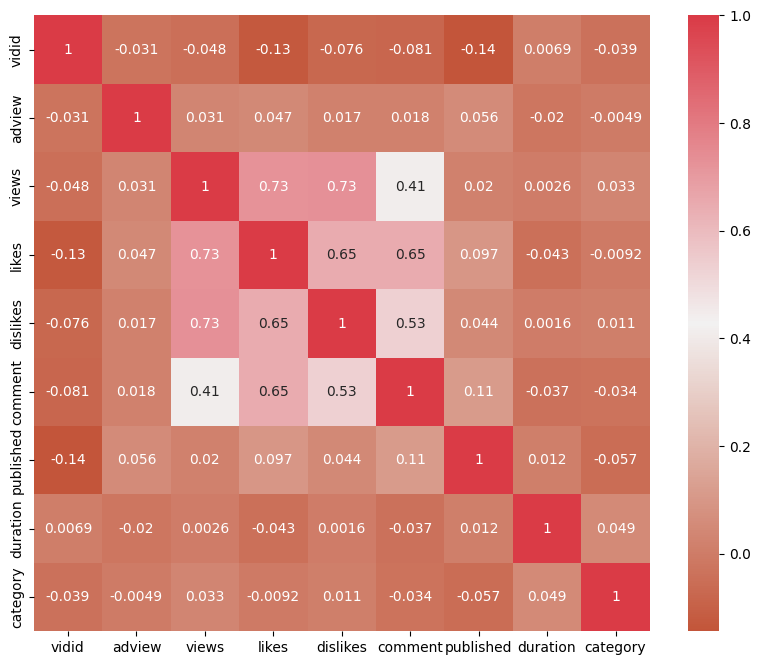

In [12]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10,8))
correlation = data.corr()
sns.heatmap(correlation, mask = np.zeros_like(correlation, dtype = np.bool), cmap = sns.diverging_palette(20, 10, as_cmap=True),
            square=True, ax=ax, annot=True)
plt.show()

In [13]:
# Split Data
Y_train = pd.DataFrame(data = data.iloc[:, 1].values, columns = ['target'])
data = data.drop(["adview"],axis=1)
data = data.drop(["vidid"],axis=1)
data.head()

,views,likes,dislikes,comment,published,duration,category
0,1031602,8523,363,1095,2168,457,6
1,1707,56,2,6,2185,570,4
2,2023,25,0,2,2094,136,3
3,620860,777,161,153,2119,262,8
4,666,1,0,0,2091,31,4


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, Y_train, test_size=0.2, random_state=42)
X_train.shape

(11708, 7)

In [15]:
# Normalise Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

0.1739096800320488

In [16]:
from sklearn import metrics
def print_error(X_test, y_test, model_name):
    prediction = model_name.predict(X_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

## Model Building

## Linear Regression

In [17]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


## Support Vector Regressor

In [18]:
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

C:\Users\shrut\anaconda3\envs\TensorFlow\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.3780058245316
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


## Decision Tree Regressor

In [19]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test,y_test, decision_tree)

Mean Absolute Error: 2565.3620218579235
Mean Squared Error: 881113105.9972677
Root Mean Squared Error: 29683.549417097474


## Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test, random_forest)

C:\Users\shrut\AppData\Local\Temp\ipykernel_10304\3098847528.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train,y_train)


Mean Absolute Error: 3271.1335338665353
Mean Squared Error: 634106350.7622075
Root Mean Squared Error: 25181.46839964277


# Building Artificial Neural Network

In [21]:
import keras
from keras.layers import Dense
ann = keras.models.Sequential([Dense(6, activation="relu", input_shape=X_train.shape[1:]), Dense(6,activation="relu"), Dense(1)])
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])
history=ann.fit(X_train,y_train,epochs=100)

Epoch 1/100
366/366 [==============================] - 6s 14ms/step - loss: 767404992.0000 - mean_squared_error: 767404992.0000
Epoch 2/100
366/366 [==============================] - 2s 6ms/step - loss: 767396992.0000 - mean_squared_error: 767396992.0000
Epoch 3/100
366/366 [==============================] - 1s 2ms/step - loss: 767383168.0000 - mean_squared_error: 767383168.0000
Epoch 4/100
366/366 [==============================] - 1s 2ms/step - loss: 767359808.0000 - mean_squared_error: 767359808.0000
Epoch 5/100
366/366 [==============================] - 1s 2ms/step - loss: 767323776.0000 - mean_squared_error: 767323776.0000
Epoch 6/100
366/366 [==============================] - 1s 2ms/step - loss: 767276160.0000 - mean_squared_error: 767276160.0000
Epoch 7/100
366/366 [==============================] - 1s 2ms/step - loss: 767221632.0000 - mean_squared_error: 767221632.0000
Epoch 8/100
366/366 [==============================] - 1s 2ms/step - loss: 767156160.0000 - mean_squared_error

In [22]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 48        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [23]:
print_error(X_test,y_test,ann)

92/92 [==============================] - 0s 2ms/step
Mean Absolute Error: 3156.027529287941
Mean Squared Error: 828554833.4838194
Root Mean Squared Error: 28784.628423584338


## Model Saving

In [24]:
#Saving Scikitlearn models
import joblib
joblib.dump(decision_tree, "decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [25]:
# Saving Keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")